In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk
import cupy as cp

In [2]:
import os

directory = r"Y:\UGent\BioLizard - General\data\methylome"
os.chdir(directory)
print(os.getcwd())

Y:\UGent\BioLizard - General\data\methylome


In [3]:
metaData=pd.read_csv("Y:/meta_data.csv")
metaData=pd.DataFrame(metaData).reset_index(drop=True)
metaData = metaData.drop(metaData.columns[0], axis=1)

In [4]:
metaData.head()

,idBiospe,idwoman,cpn234_tad2,cpn234_tas2,cpn234_tad3,cpn234_tas3,cpn234_tad4,cpn234_tas4,cpn234_tad5,cpn234_tas5,...,c_igu_muacaz6,c_igu_bmi9,c_igu_hcaz9,c_igu_muacaz9,c_igu_bmi12,c_igu_hcaz12,c_igu_muacaz12,biospe_neonatal_mortality,last_visit_death,_list_tad
0,101,40262,6.0,9.0,5.0,12.0,7.0,12.0,NaN,NaN,...,0.08,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
1,102,16016_2,8.0,12.0,8.0,12.0,8.0,14.0,NaN,NaN,...,-1.20,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
2,103,40274,6.0,10.0,7.0,10.0,6.0,11.0,NaN,NaN,...,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
3,104,16025_3,6.0,10.0,7.0,11.0,6.0,11.0,NaN,NaN,...,0.09,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
4,105,40254,5.0,10.0,6.0,10.0,6.0,11.0,NaN,NaN,...,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3


In [5]:
sampleSheet = pd.read_csv("../../data/methylome/sampleSheet.csv")

In [6]:
sampleSheet.head()

,Sample_ID,Plate_ID,Sample_Well,Sentrix_ID,Sentrix_Position,Date,Basename
0,102,BC78,D1,2.060000e+11,R04C01,13/09/2022,206402350107_R04C01
1,103,BC79,C4,2.070000e+11,R03C01,28/09/2022,206644410180_R03C01
2,104,BC78,C2,2.060000e+11,R03C01,13/09/2022,206402350116_R03C01
3,106,BC78,G12,2.060000e+11,R07C01,13/09/2022,206425830038_R07C01
4,107,BC79,B3,2.070000e+11,R02C01,28/09/2022,206644410103_R02C01


In [7]:
# Load data
sampleSheet = pd.read_csv("../../data/methylome/sampleSheet.csv")
methylome = pd.read_csv("../../data/methylome/20240411MethylomeDataBetasWithProbId.csv")

# Process methylome data
methylome = methylome.set_index("ProbeID").T
methylome = methylome.reset_index().rename(columns={"index": "Basename"})
methylome = methylome.merge(sampleSheet[["Basename", "Sample_ID"]], on="Basename", how="left")
methylome = methylome.drop(columns=["Basename"]).rename(columns={"Sample_ID": "idBiospe"})
methylome = methylome[["idBiospe"] + [col for col in methylome.columns if col != "idBiospe"]]

# Assuming metaData is another dataframe that needs to be loaded
meta_data = metaData  # Replace with actual path to metaData file
methylome = methylome.merge(meta_data[["idBiospe", "code_bep_n"]], on="idBiospe", how="left")
methylome = methylome.rename(columns={"code_bep_n": "class"})
methylome["class"] = methylome["class"] - 1
methylome["timePoint"] = "Pn56"
methylome = methylome.sort_values(by=["timePoint", "idBiospe"])
methylome = methylome[["timePoint", "idBiospe", "class"] + [col for col in methylome.columns if col not in ["timePoint", "idBiospe", "class"]]]

In [8]:
methylome.head(30)

,timePoint,idBiospe,class,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,...,cg17939569,cg13365400,cg02600718,cg21106100,cg08265308,cg10488260,cg14273923,cg09748881,cg07587934,cg16855331
0,Pn56,102,2,0.370702,0.906810,0.729572,0.919086,0.748790,0.131226,0.131664,...,NaN,NaN,0.204499,0.233191,0.410137,0.116070,0.238445,NaN,0.806420,0.415945
1,Pn56,103,2,0.352146,0.475196,0.227495,0.772063,0.737550,0.225267,0.213943,...,0.741882,0.607857,0.247206,0.637003,0.849188,0.504236,0.440615,0.823711,0.777729,0.567635
2,Pn56,104,1,0.307659,0.872990,0.657483,0.819911,0.548639,0.126281,0.118666,...,0.227705,0.235356,0.231018,0.234811,0.420113,0.139597,0.223410,0.199689,0.807111,0.493500
3,Pn56,106,0,0.369779,0.875169,0.725316,0.909891,0.587720,0.091899,0.120725,...,0.815071,0.513299,0.249403,0.745385,0.924718,0.591618,0.713801,0.852716,0.782532,0.491458
4,Pn56,107,0,0.325455,0.826068,0.612782,0.738983,0.641742,0.245444,0.265556,...,NaN,NaN,0.261898,0.229423,0.438345,0.211108,NaN,NaN,0.815358,0.434790
5,Pn56,109,1,0.335254,0.859299,0.720324,0.859915,0.626692,0.114128,0.112664,...,0.750602,0.473561,0.227851,0.899750,0.924760,0.391456,0.810127,0.746885,0.818290,0.505662
6,Pn56,110,2,0.554714,0.881504,0.687885,0.851117,0.669206,0.105999,0.162168,...,NaN,NaN,0.246564,0.253218,0.412819,0.138194,NaN,0.216414,0.823519,0.465784
7,Pn56,112,0,0.665123,0.936929,0.773192,0.832327,0.609909,0.126268,0.186922,...,0.230692,0.227732,0.254356,0.225905,0.389093,0.189091,NaN,NaN,0.798229,0.417867
8,Pn56,113,0,0.369006,0.864040,0.693321,0.847711,0.721725,0.137078,0.113993,...,0.222673,NaN,NaN,0.219803,0.463869,0.168533,0.245503,NaN,0.851469,0.416282
9,Pn56,114,2,0.309475,0.605469,0.559015,0.853587,0.735287,0.077172,0.130759,...,0.768983,0.529242,0.219134,0.804604,0.930088,0.538191,0.855217,0.764714,0.817391,0.626756


In [9]:
methylome = methylome.drop("idBiospe", axis=1)
methylome = methylome.drop("timePoint", axis=1)

In [10]:
methylome.head(10)

,class,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg17939569,cg13365400,cg02600718,cg21106100,cg08265308,cg10488260,cg14273923,cg09748881,cg07587934,cg16855331
0,2,0.370702,0.906810,0.729572,0.919086,0.748790,0.131226,0.131664,0.672684,0.675035,...,NaN,NaN,0.204499,0.233191,0.410137,0.116070,0.238445,NaN,0.806420,0.415945
1,2,0.352146,0.475196,0.227495,0.772063,0.737550,0.225267,0.213943,0.688005,0.659342,...,0.741882,0.607857,0.247206,0.637003,0.849188,0.504236,0.440615,0.823711,0.777729,0.567635
2,1,0.307659,0.872990,0.657483,0.819911,0.548639,0.126281,0.118666,0.791500,0.813271,...,0.227705,0.235356,0.231018,0.234811,0.420113,0.139597,0.223410,0.199689,0.807111,0.493500
3,0,0.369779,0.875169,0.725316,0.909891,0.587720,0.091899,0.120725,0.561473,0.782631,...,0.815071,0.513299,0.249403,0.745385,0.924718,0.591618,0.713801,0.852716,0.782532,0.491458
4,0,0.325455,0.826068,0.612782,0.738983,0.641742,0.245444,0.265556,0.743723,0.654437,...,NaN,NaN,0.261898,0.229423,0.438345,0.211108,NaN,NaN,0.815358,0.434790
5,1,0.335254,0.859299,0.720324,0.859915,0.626692,0.114128,0.112664,0.792145,0.728729,...,0.750602,0.473561,0.227851,0.899750,0.924760,0.391456,0.810127,0.746885,0.818290,0.505662
6,2,0.554714,0.881504,0.687885,0.851117,0.669206,0.105999,0.162168,0.708349,0.855416,...,NaN,NaN,0.246564,0.253218,0.412819,0.138194,NaN,0.216414,0.823519,0.465784
7,0,0.665123,0.936929,0.773192,0.832327,0.609909,0.126268,0.186922,0.701086,0.870693,...,0.230692,0.227732,0.254356,0.225905,0.389093,0.189091,NaN,NaN,0.798229,0.417867
8,0,0.369006,0.864040,0.693321,0.847711,0.721725,0.137078,0.113993,0.890438,0.599843,...,0.222673,NaN,NaN,0.219803,0.463869,0.168533,0.245503,NaN,0.851469,0.416282
9,2,0.309475,0.605469,0.559015,0.853587,0.735287,0.077172,0.130759,0.701003,0.461794,...,0.768983,0.529242,0.219134,0.804604,0.930088,0.538191,0.855217,0.764714,0.817391,0.626756


In [11]:
methylome.shape

(219, 865860)

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Separate features and target
X = methylome.drop('class', axis=1)
y = methylome['class']

# Re-encode the labels in the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# param tuning
params = {
    'tree_method': 'hist',  # Use GPU accelerated algorithm
    'predictor': 'gpu_predictor',  # Use GPU for prediction
    'device': 'cuda',  # Use CUDA for GPU acceleration
    'max_depth':10,
    'eta': 0.2,
    'objective': 'multi:softmax',
    'num_class': 4  # Number of unique classes in the target variable
}

epochs=10
model = xgb.train(params, dtrain,epochs)

c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
y_pred = model.predict(dtest)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.25



Top 10 Most Important Features:
cg14817997: 2.0


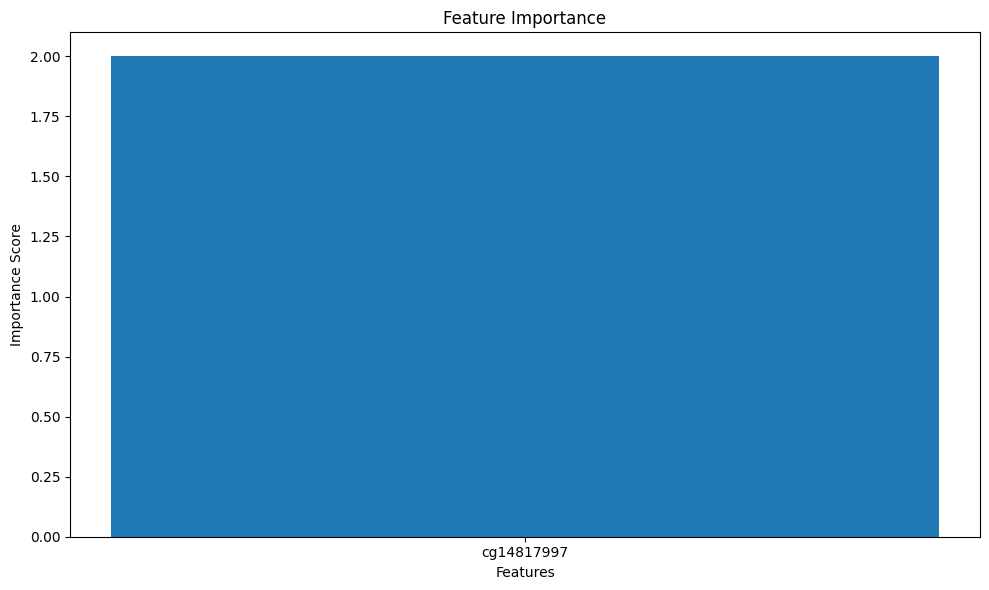

In [15]:
# Get feature importance
importance = model.get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("\nTop 10 Most Important Features:")
for feature, score in importance[:10]:
    print(f"{feature}: {score}")

# If you want to visualize the feature importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), [score for feature, score in importance])
plt.xticks(range(len(importance)), [feature for feature, score in importance], rotation='horizontal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [16]:
print(model.get_score(importance_type='weight'))  # Feature counts
print(model.get_score(importance_type='gain'))    # Feature gains
print(model.get_score(importance_type='cover'))

{'cg14817997': 2.0}
{'cg14817997': 359.0078125}
{'cg14817997': 66.10433197021484}


In [17]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict labels and probabilities
y_pred = model.predict(dtest)
y_prob = model.predict(dtest, output_margin=True)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix and derived metrics
cm = confusion_matrix(y_test, y_pred)
n_classes = len(np.unique(y_test))

sensitivity = []
specificity = []
ppv = []
npv = []

for i in range(n_classes):
    tp = cm[i, i]
    fn = np.sum(cm[i, :]) - tp
    fp = np.sum(cm[:, i]) - tp
    tn = np.sum(cm) - (tp + fn + fp)
    
    sensitivity.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
    specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    ppv.append(tp / (tp + fp) if (tp + fp) > 0 else 0)
    npv.append(tn / (tn + fn) if (tn + fn) > 0 else 0)

balanced_accuracy = (np.mean(sensitivity) + np.mean(specificity)) / 2

# AUC calculation
y_test_bin = label_binarize(y_test, classes=range(n_classes))
auc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')

# Print results
metrics = {
    'Accuracy': accuracy,
    'Kappa': kappa,
    'Sensitivity': np.mean(sensitivity),
    'Specificity': np.mean(specificity),
    'Positive Predictive Value': np.mean(ppv),
    'Negative Predictive Value': np.mean(npv),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Balanced Accuracy': balanced_accuracy,
    'AUC': auc
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.2500
Kappa: 0.0000
Sensitivity: 0.2500
Specificity: 0.7500
Positive Predictive Value: 0.0625
Negative Predictive Value: 0.5625
Precision: 0.0625
Recall: 0.2500
F1 Score: 0.1000
Balanced Accuracy: 0.5000
AUC: 0.5000


c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
model.save_model("xgboost4classModel.json")

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # For multiclass AUC
    n_classes = len(np.unique(y_true))
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    auc = roc_auc_score(y_true_bin, y_prob, average='weighted', multi_class='ovr')
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Create DMatrix for training data if not already done
dtrain = xgb.DMatrix(X_train, label=y_train)

# Make predictions on training set
y_train_pred = model.predict(dtrain)
y_train_prob = model.predict(dtrain, output_margin=True)

# Make predictions on test set
y_test_pred = model.predict(dtest)
y_test_prob = model.predict(dtest, output_margin=True)

# Calculate metrics for training set
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

# Calculate metrics for test set
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

# Print results
print("Training Set Performance:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Set Performance:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

Training Set Performance:
Accuracy: 0.3029
Precision: 0.0917
Recall: 0.3029
F1 Score: 0.1408
AUC: 0.5000

Test Set Performance:
Accuracy: 0.2500
Precision: 0.0625
Recall: 0.2500
F1 Score: 0.1000
AUC: 0.5000


c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma':[0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create an XGBClassifier
xgb_model = XGBClassifier(
    tree_method='hist',
    predictor='gpu_predictor',
    device='cuda',
    objective='multi:softmax',
    metric='mlogloss',
    num_class=4
)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


KeyboardInterrupt: 

In [22]:
import notebook
print(notebook.__version__)


7.0.6
